In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


In [2]:
archivo = "../data/mapa.ill"
datos  = np.genfromtxt(archivo,skip_header=4,delimiter=",")


In [3]:
# eliminar los datos que no necesito, como mes, dia hora, etc
todos = datos[:,6:].copy()

In [4]:
illuminancia  = todos.reshape((365,24,11,11))

In [11]:
under = 300.
over  = 1500.
hora_inicio = 8
hora_final  = 18
tiempo      = (hora_final - hora_inicio) * 365


UDI_under = np.zeros((11,11))
UDI_under




array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:

UDI_under  = np.zeros((11,11))
UDI_useful = np.zeros((11,11))
UDI_over   = np.zeros((11,11))

_,_,x,y = illuminancia.shape
for day in range(365):
    for hora in range(hora_inicio, hora_final):
#         print(hora)
        for i in range(x):
            for j in range(y):
                if illuminancia[day,hora,i,j] < under:
                    UDI_under[i,j] += 1 
                    
                if (illuminancia[day,hora,i,j] >= under) & (illuminancia[day,hora,i,j] <= over)  :
                    UDI_useful[i,j] += 1 
                    
                if illuminancia[day,hora,i,j] > over:
                    UDI_over[i,j] += 1 

UDI_under  = UDI_under / tiempo * 100
UDI_useful = UDI_useful / tiempo * 100
UDI_over   = UDI_over / tiempo * 100
UDI_under + UDI_useful + UDI_over


array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]])

In [75]:
(illuminancia[0][11] < under) 

array([[ True,  True,  True, False, False, False, False,  True,  True,
         True,  True],
       [ True,  True, False, False, False, False, False, False,  True,
         True,  True],
       [ True,  True,  True, False, False, False, False, False,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

In [42]:
(illuminancia[0][11] < under) * np.ones((11,11))

array([[1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [43]:
((illuminancia[0][11] >= under) & (illuminancia[0][11] <= over )  ) * np.ones((11,11))

array([[0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:

UDI_under  = np.zeros((11,11))
UDI_useful = np.zeros((11,11))
UDI_over   = np.zeros((11,11))


for dia in range(365):
    for hora in range(hora_inicio,hora_final):
            UDI_under += (illuminancia[dia][hora] < under) * np.ones((11,11))
            UDI_useful  += ((illuminancia[dia][hora] >= under) & (illuminancia[dia][hora] <= over )  ) * np.ones((11,11))
            UDI_over += (illuminancia[dia][hora] > over) * np.ones((11,11))

            

            
UDI_under   = UDI_under /  tiempo * 100
UDI_useful  = UDI_useful / tiempo * 100
UDI_over    = UDI_over / tiempo * 100
UDI_under + UDI_useful + UDI_over




array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]])

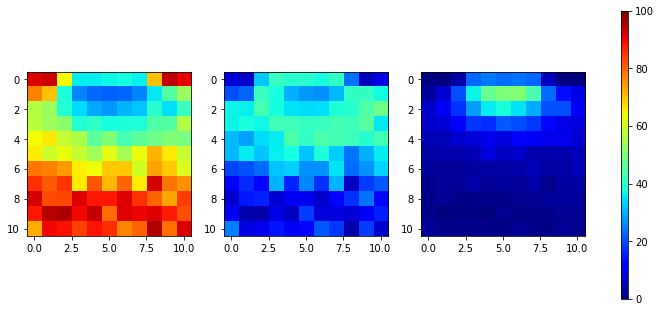

In [69]:
def UDI(under=300,over=1500, hora_inicio=8,hora_final=18):
    UDI_under  = np.zeros((11,11))
    UDI_useful = np.zeros((11,11))
    UDI_over   = np.zeros((11,11))


    for dia in range(365):
        for hora in range(hora_inicio,hora_final):
                UDI_under += (illuminancia[dia][hora] < under) * np.ones((11,11))
                UDI_useful  += ((illuminancia[dia][hora] >= under) & (illuminancia[dia][hora] <= over )  ) * np.ones((11,11))
                UDI_over += (illuminancia[dia][hora] > over) * np.ones((11,11))




    UDI_under   = UDI_under /  tiempo * 100
    UDI_useful  = UDI_useful / tiempo * 100
    UDI_over    = UDI_over / tiempo * 100
    check_UDI   = UDI_under + UDI_useful + UDI_over
    
    fig, ax  = plt.subplots(1,3,figsize=(10,4))
    barra = ax[0].imshow(UDI_under ,cmap="jet",vmin=0,vmax=100)
    ax[1].imshow(UDI_useful,cmap="jet",vmin=0,vmax=100)
    ax[2].imshow(UDI_over  ,cmap="jet",vmin=0,vmax=100)
#     ax[3].imshow(check_UDI ,cmap="jet",vmin=0,vmax=100)
    cb_ax = fig.add_axes([.95,0,0.01,1])
    cbar = fig.colorbar(barra,cax=cb_ax)
UDI()

In [74]:
def UDI(under=300,over=1500, hora_inicio=8,hora_final=18):
    UDI_under  = np.zeros((11,11))
    UDI_useful = np.zeros((11,11))
    UDI_over   = np.zeros((11,11))


    for dia in range(365):
        for hora in range(hora_inicio,hora_final):
                UDI_under += (illuminancia[dia][hora] < under) * np.ones((11,11))
                UDI_useful  += ((illuminancia[dia][hora] >= under) & (illuminancia[dia][hora] <= over )  ) * np.ones((11,11))
                UDI_over += (illuminancia[dia][hora] > over) * np.ones((11,11))




    UDI_under   = UDI_under /  tiempo * 100
    UDI_useful  = UDI_useful / tiempo * 100
    UDI_over    = UDI_over / tiempo * 100
    check_UDI   = UDI_under + UDI_useful + UDI_over
    
    fig, ax  = plt.subplots(1,3,figsize=(10,4))
    barra = ax[0].imshow(UDI_under ,cmap="jet",vmin=0,vmax=100)
    ax[1].imshow(UDI_useful,cmap="jet",vmin=0,vmax=100)
    ax[2].imshow(UDI_over  ,cmap="jet",vmin=0,vmax=100)
#     ax[3].imshow(check_UDI ,cmap="jet",vmin=0,vmax=100)
    cb_ax = fig.add_axes([.95,0,0.01,1])
    cbar = fig.colorbar(barra,cax=cb_ax)

    
interact(UDI,under=(10,500,10),over=(1000,2500,100),hora_inicio=(5,10,1),hora_final=(15,18,1))

interactive(children=(IntSlider(value=300, description='under', max=500, min=10, step=10), IntSlider(value=150…

<function __main__.UDI(under=300, over=1500, hora_inicio=8, hora_final=18)>